In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [22]:
df = pd.read_csv('50_Startups.csv').dropna()
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [9]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = ct.fit_transform(X)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [29]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), axis=1))

[[126362.88 134307.35]
 [ 84608.45  81005.76]
 [ 99677.49  99937.59]
 [ 46357.46  64926.08]
 [128750.48 125370.37]
 [ 50912.42  35673.41]
 [109741.35 105733.54]
 [100643.24 107404.34]
 [ 97599.28  97427.84]
 [113097.43 122776.86]]


In [31]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print('R2 Score:', r2_score(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))

R2 Score: 0.8987266414319911
Mean Squared Error: 82010363.04500768
Mean Absolute Error: 6961.477813274124


<Axes: ylabel='Count'>

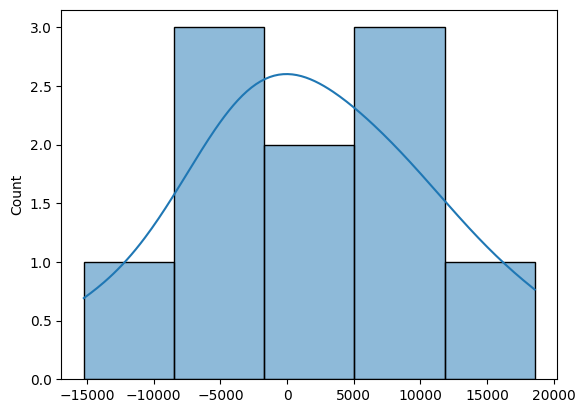

In [33]:
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)